In [30]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data)
iris_df['class']=iris.target_names[iris.target ]
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

X = iris_df.sample(frac=1, random_state=1).reset_index(drop=True)
TRAIN_SPLIT = 100

# Trainingsdaten
X_train = X[0:TRAIN_SPLIT]
y_train = X_train['class']

# Achtung, neu: drop löscht eine Spalte aus einem Dataframe
X_train = X_train.drop(['class'], axis=1)
print( X_train.head())

# Testdaten
X_test = X[TRAIN_SPLIT:]
y_test = X_test['class']
X_test = X_test.drop(['class'], axis=1)


print(f'Shape of Training-Data   : {X_train.shape}')
print(f'Shape of Test-Data       : {X_test.shape}')
print(f'Shape of Training-Labels : {y_train.shape}')
print(f'Labels Count in Train-Set:\n{X[0:TRAIN_SPLIT]["class"].value_counts()}')



   sepal_len  sepal_wid  petal_len  petal_wid
0        5.8        4.0        1.2        0.2
1        5.1        2.5        3.0        1.1
2        6.6        3.0        4.4        1.4
3        5.4        3.9        1.3        0.4
4        7.9        3.8        6.4        2.0
Shape of Training-Data   : (100, 4)
Shape of Test-Data       : (50, 4)
Shape of Training-Labels : (100,)
Labels Count in Train-Set:
virginica     37
versicolor    32
setosa        31
Name: class, dtype: int64


# Entscheidungbaum erzeugen

Accuracy-Training :  0.99
Accuracy-Testing  :  0.9
Creating Tree ... 


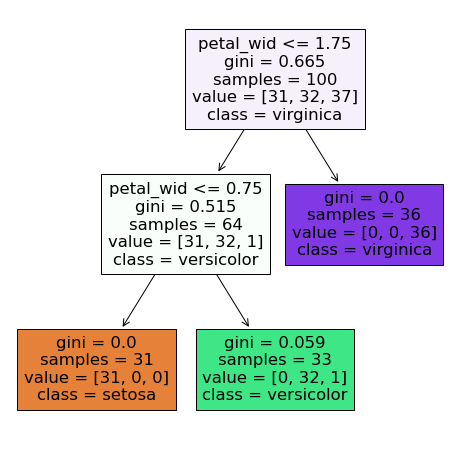

In [65]:
clf = DecisionTreeClassifier(random_state=1234, criterion = 'gini', max_depth=2)
model = clf.fit(X_train, y_train)

print("Accuracy-Training : ", clf.score(X_train, y_train))
print("Accuracy-Testing  : ", clf.score(X_test, y_test))

print("Creating Tree ... ")
fig = plt.figure(figsize=(8,8))
p = tree.plot_tree(clf
                   , feature_names=X.columns
                   , class_names=['setosa', 'versicolor', 'virginica']
                   , filled=True
                   )

# Prediction

In [66]:
i = 17
x = X_train.iloc[i:i+1]
y_pred = model.predict( x )
print( "x (to predict): \n", x )
print( "\n" )
print( "Prediction    : ", y_pred )
print( "Correct Label : ", y_train[i:i+1] )

x (to predict): 
     sepal_len  sepal_wid  petal_len  petal_wid
17        5.6        3.0        4.5        1.5


Prediction    :  ['versicolor']
Correct Label :  17    versicolor
Name: class, dtype: object


# Manuelle Berechnung der Accuracy

## Accuracy on Training-Set

In [67]:
N = X_train.shape[0]
y_pred = model.predict( X_train )
check_vector = (y_pred==y_train)
c = check_vector.sum()
print(check_vector[0:10])
print("Accuracy (manuell) ..: ", c/N)

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: class, dtype: bool
Accuracy (manuell) ..:  0.99


## Accuracy on Test-Set

In [68]:
N = X_test.shape[0]
y_pred = model.predict( X_test )
check_vector = (y_pred==y_test)
c = check_vector.sum()
print(check_vector[0:10])
print("Accuracy (selbst berechnet) ..: ", c/N)

100    True
101    True
102    True
103    True
104    True
105    True
106    True
107    True
108    True
109    True
Name: class, dtype: bool
Accuracy (seblst berechnet) ..:  0.9


## Fehler ausgeben

In [63]:
import numpy as np

N = X_train.shape[0]
y_pred = model.predict( X_train )
check_vector = (y_pred==y_train)

for i in np.arange(0,N):
    if check_vector[i]:
        print (check_vector[i])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
